In [4]:
import pandas as pd

In [5]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [6]:
base = pd.read_csv(path_base('db_dados_credito.csv'))

C:\MyPhyton\DataScience\notebook
C:\MyPhyton\DataScience\data
C:\MyPhyton\DataScience\data\db_dados_credito.csv


In [7]:
base = base.dropna()

In [5]:
base.head(3)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0


In [6]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x28f32279ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x28f322b4d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f3023dd48>],
 'medians': [<matplotlib.lines.Line2D at 0x28f322bbbc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f322bbcc8>],
 'means': []}

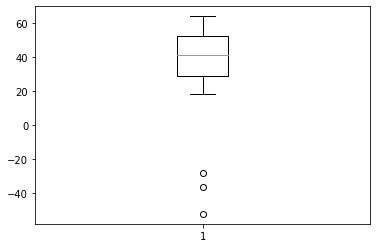

In [7]:
plt.boxplot(base.age,showfliers=True)

In [8]:
outliers_age = base[(base.age<-20)]

In [9]:
outliers_age

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


{'whiskers': [<matplotlib.lines.Line2D at 0x28f323475c8>,
 'caps': [<matplotlib.lines.Line2D at 0x28f32358e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f322f1488>],
 'medians': [<matplotlib.lines.Line2D at 0x28f3235dec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f32361d48>],
 'means': []}

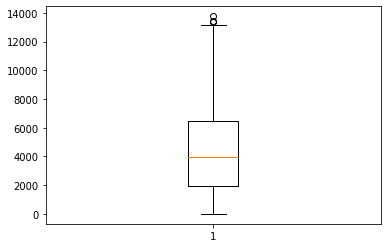

In [10]:
plt.boxplot(base.loan,showfliers=True)

In [11]:
outliers_loan = base[(base.loan>13400)]

In [12]:
outliers_loan

,clientid,income,age,loan,default
1378,1379,69755.320163,44.543682,13766.051239,0
1801,1802,67802.694456,49.037987,13443.473176,0


# Duas variaveis

In [13]:
# income age

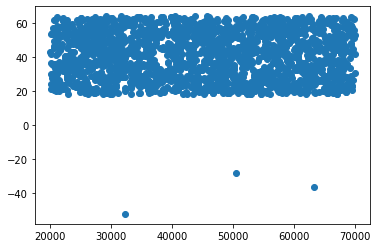

In [14]:
plt.scatter(base.income,base.age)

In [15]:
# income loan

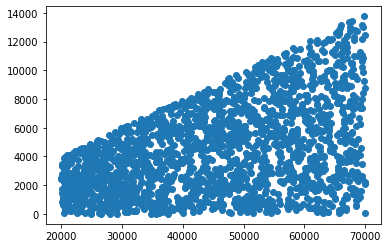

In [16]:
plt.scatter(base.income,base.loan)

In [17]:
# age loan

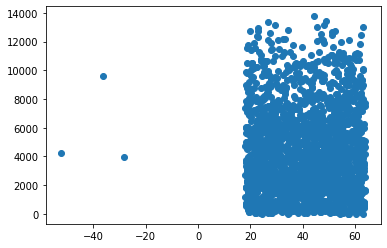

In [18]:
plt.scatter(base.age,base.loan)

In [19]:
base.loc[base.age<0,'age'] = 40.92

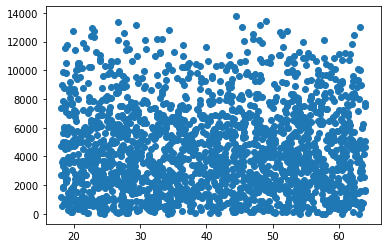

In [20]:
plt.scatter(base.age,base.loan)

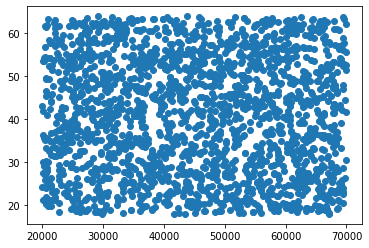

In [21]:
plt.scatter(base.income,base.age)

# Census

In [36]:
census = pd.read_csv('C:\\Users\\vlmbl\\Documents\\MyPython\\DataScience\\data\\census.csv')


In [37]:
census.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


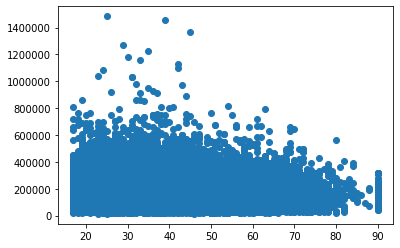

In [38]:
plt.scatter(census.age,census.iloc[:,2])

# PyOD

In [41]:
#!pip install pyod

In [40]:
base = pd.read_csv('C:\\Users\\vlmbl\\Documents\\MyPython\\DataScience\\data\\credit_data.csv')

In [42]:
from pyod.models.knn import KNN

In [46]:
base = base.dropna()
detector = KNN()

In [47]:
detector.fit(base.iloc[:,1:4])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [57]:
previsoes = detector.labels_

In [58]:
confianca_previsoes = detector.decision_scores_

In [59]:
confianca_previsoes

array([ 704.78948078,  365.218309  ,  583.2159934 , ...,  395.01466508,
        557.88978241, 1071.5109404 ])

In [60]:
outliers= []

In [61]:
for i in range(len(previsoes)):
    if previsoes[i]==1:
        outliers.append(i)

In [63]:
#lista de outliers

In [64]:
lista = base.iloc[outliers,:]

In [65]:
lista

,clientid,income,age,loan,default
4,5,66952.688845,18.584336,8770.099235,1
24,25,65301.984029,48.840922,5465.267886,0
29,30,58842.891308,54.510948,10871.186790,0
34,35,57584.973790,36.672021,1728.423755,0
38,39,60921.063104,18.840526,968.836383,0
...,...,...,...,...,...
1943,1944,59792.508585,24.187499,660.241453,0
1944,1945,35879.519994,41.072935,5335.403499,0
1957,1958,50458.958203,52.314565,9852.889427,0
1996,1997,69516.127573,23.162104,3503.176156,0
